# Table of Contents
 <p><div class="lev1"><a href="#Run-exported-HTML-example-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Run exported HTML example</a></div>

In [70]:
import os
import numpy
import matplotlib.pyplot as plt
from mapboxgl.viz import ImageViz, CircleViz
import pandas as pd
from matplotlib import cm
import numpy as np
from mapboxgl.utils import *
from copy import copy
import matplotlib.colors as colors

%matplotlib inline

In [2]:
token = os.getenv('MAPBOX_ACCESS_TOKEN')
token

'pk.eyJ1Ijoia3VjaGFhbGUiLCJhIjoiY2ppYnpvbmwxMDIwdjNwcnZzenNzeW84aCJ9.6G0MzqXRy1m_3x-Afj6Maw'

In [3]:
img_url = './mosaic.png'
img_url = 'https://raw.githubusercontent.com/mapbox/mapboxgl-jupyter/master/examples/data/mosaic.png'
# Coordinates must be an array in the form of [UL, UR, LR, LL]
coordinates = [
    [-123.40515640309, 38.534294809274336],
    [-115.92938988349292, 38.534294809274336],
    [-115.92938988349292, 32.08296982365502], 
    [-123.40515640309, 32.08296982365502]]

# Create the viz from the dataframe
viz = ImageViz(img_url, coordinates, access_token=token,
                height='600px',
                center = (-119, 35),
                zoom = 5,
                below_layer = 'waterway-label')
viz.show()

In [80]:
img_url = './radar_image_edited.png'
#img_url = 'https://raw.githubusercontent.com/mapbox/mapboxgl-jupyter/master/examples/data/mosaic.png'
# Coordinates must be an array in the form of [UL, UR, LR, LL]
coordinates = [
    [11.284418, 51.345786],
    [19.621754, 51.345786],
    [19.621754, 48.05766], 
    [11.284418, 48.05766]]

# Create the viz from the dataframe
viz = ImageViz(img_url, coordinates, access_token=token,
                height='380px',
                center = (15, 50),
                zoom = 5,
                below_layer = 'waterway-label')
viz.show()

In [52]:
img = plt.imread(img_url)
#img = numpy.mean(img[::, ::], axis=2)
#img = cm.Set1(img)#, alpha=None)
#img.shape

In [91]:
from metpy.plots import ctables

norm, cmap = ctables.registry.get_with_steps('NWSReflectivity',-20., 0.5)#ctable, beg, inc)


In [84]:
cmap

In [85]:
plt.cm.get_cmap('gray')

In [98]:
img = imread(img_url)

In [101]:
img.max()

1.0

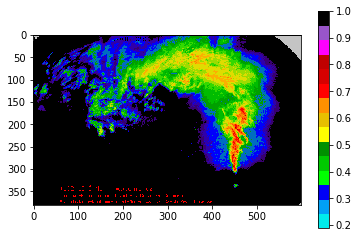

In [109]:
img = imread(img_url)
#img = numpy.mean(img[::, ::], axis=2)
#img = cm.magma(img)
img[img == 0] = np.nan
palette = copy(cmap)#plt.cm.get_cmap('gray'))
palette.set_bad(alpha = 0)
#Zm = np.ma.masked_where(img > 0.2, img)
im = plt.imshow(img, cmap=palette)#, norm=colors.Normalize(vmin=0, vmax=1.0),\
                        #aspect='auto', origin='upper')
plt.colorbar(im)

In [136]:
img = imread(img_url)
print(img.shape)
im2 = np.zeros(img[:,:,0].shape + (4,))
print(im2.shape)
im2[:, :, :3] = img
img = numpy.mean(img[::, ::], axis=2)
#img = cm.magma(img)
img[img < 0.1] = np.nan
im2[:,:,3] = img

(380, 599, 3)
(380, 599, 4)



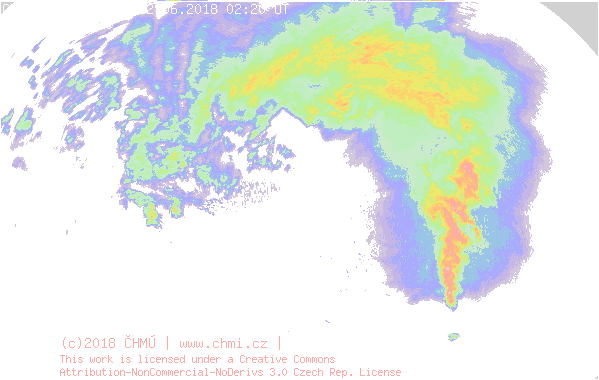

In [185]:
coordinates = [
    [11.284418, 51.345786],
    [19.621754, 51.345786],
    [19.621754, 48.05766], 
    [11.284418, 48.05766]]

# Create the viz from the dataframe
viz = ImageViz(im2, coordinates, access_token=token,
                height='380px',
                center = (15, 50),
                zoom = 5,
                below_layer = 'waterway-label')
viz.show()

In [139]:
help(ImageViz)

Help on class ImageViz in module mapboxgl.viz:

class ImageViz(MapViz)
 |  Create a image viz
 |  
 |  Method resolution order:
 |      ImageViz
 |      MapViz
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, image, coordinates, *args, **kwargs)
 |      Construct a Mapviz object
 |      
 |      :param coordinates: property to determine image coordinates (UL, UR, LR, LL).
 |          EX. [[-80.425, 46.437], [-71.516, 46.437], [-71.516, 37.936], [-80.425, 37.936]]
 |      :param image: url, local path or a numpy ndarray
 |  
 |  add_unique_template_variables(self, options)
 |      Update map template variables specific to image visual
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from MapViz:
 |  
 |  as_iframe(self, html_data)
 |      Build the HTML representation for the mapviz.
 |  
 |  create_html(self)
 |      Create a circle visual from a geojson data source
 |  
 |  show(self, **kwargs)
 |  
 | 


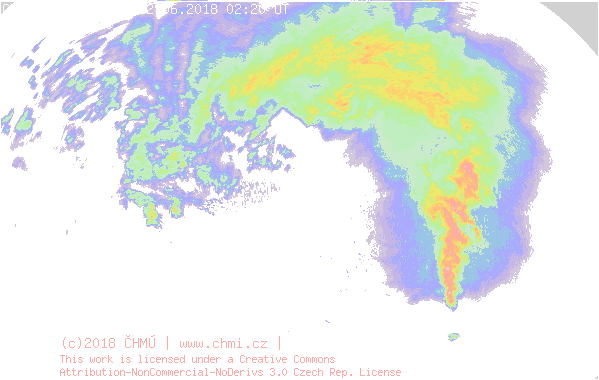

In [187]:
viz.show()

In [188]:
with open('viz2.html', 'w') as f:
    f.write(viz.create_html())

# Run exported HTML example
Python2: python -m SimpleHTTPServer 8080

Python3: python3 -m http.server 8080

Now navigate your browser to http://localhost:8080/viz2.html to see the v